# Demo for stable-diffusion-pytorch

## Install (takes about 1~5 minutes)

In [1]:
%cd /content
!git clone https://github.com/kjsman/stable-diffusion-pytorch

[WinError 2] The system cannot find the file specified: '/content'
c:\Users\Charles Xie\OneDrive\Desktop\Duke\Fall 2025\ECE 590 Practical ML\Project\stable-diffusion-pytorch


Cloning into 'stable-diffusion-pytorch'...


In [2]:
# Note that all depencdencies of stable-diffusion-pytorch is pre-installed
# on Colab environment. This cell basically does nothing on Colab.
%cd /content/stable-diffusion-pytorch
%pip install -r requirements.txt

[WinError 3] The system cannot find the path specified: '/content/stable-diffusion-pytorch'
c:\Users\Charles Xie\OneDrive\Desktop\Duke\Fall 2025\ECE 590 Practical ML\Project\stable-diffusion-pytorch
Note: you may need to restart the kernel to use updated packages.


In [3]:
%cd /content/stable-diffusion-pytorch
import os
os.chdir(r"C:\Users\Charles Xie\OneDrive\Desktop\Duke\Fall 2025\ECE 590 Practical ML\Project\stable-diffusion-pytorch")
import urllib.request
url = "https://huggingface.co/jinseokim/stable-diffusion-pytorch-data/resolve/main/data.v20221029.tar"
urllib.request.urlretrieve(url, "data.v20221029.tar")
import tarfile
with tarfile.open("data.v20221029.tar") as tar:
    tar.extractall()

# !wget https://huggingface.co/jinseokim/stable-diffusion-pytorch-data/resolve/main/data.v20221029.tar
# !tar -xf data.v20221029.tar

[WinError 3] The system cannot find the path specified: '/content/stable-diffusion-pytorch'
c:\Users\Charles Xie\OneDrive\Desktop\Duke\Fall 2025\ECE 590 Practical ML\Project\stable-diffusion-pytorch


KeyboardInterrupt: 

## Run

In [4]:
#@title Preload models (takes about ~20 seconds on default settings)

from stable_diffusion_pytorch import model_loader
models = model_loader.preload_models('cuda')

100%|██████████| 50/50 [00:18<00:00,  2.71it/s]


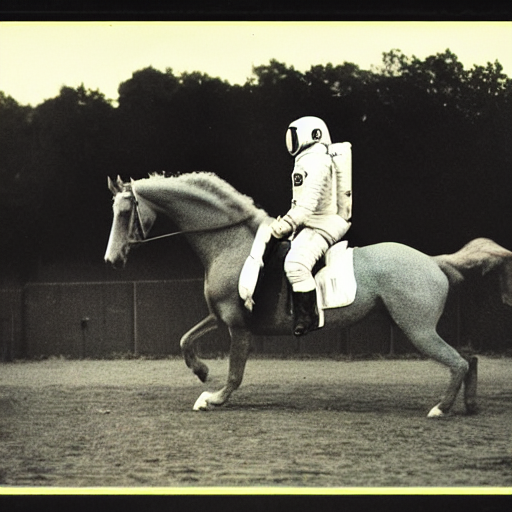

In [5]:
#@title Inference (takes about 30~40 seconds on default settings)

from stable_diffusion_pytorch import pipeline

prompt = "a photograph of an astronaut riding a horse"  #@param { type: "string" }
prompts = [prompt]

uncond_prompt = ""  #@param { type: "string" }
uncond_prompts = [uncond_prompt] if uncond_prompt else None

upload_input_image = False  #@param { type: "boolean" }
input_images = None
if upload_input_image:
    from PIL import Image
    from google.colab import files
    print("Upload an input image:")
    path = list(files.upload().keys())[0]
    input_images = [Image.open(path)]

strength = 0.8  #@param { type:"slider", min: 0, max: 1, step: 0.01 }

do_cfg = True  #@param { type: "boolean" }
cfg_scale = 7.5  #@param { type:"slider", min: 1, max: 14, step: 0.5 }
height = 512  #@param { type: "integer" }
width = 512  #@param { type: "integer" }
sampler = "k_lms"  #@param ["k_lms", "k_euler", "k_euler_ancestral"]
n_inference_steps = 50  #@param { type: "integer" }

use_seed = False  #@param { type: "boolean" }
if use_seed:
    seed = 42  #@param { type: "integer" }
else:
    seed = None

pipeline.generate(prompts=prompts, uncond_prompts=uncond_prompts,
                  input_images=input_images, strength=strength,
                  do_cfg=do_cfg, cfg_scale=cfg_scale,
                  height=height, width=width, sampler=sampler,
                  n_inference_steps=n_inference_steps, seed=seed,
                  models=models, device='cuda', idle_device='cpu')[0]

In [ ]:
# import os
# import torch
# from PIL import Image
# from stable_diffusion_pytorch import pipeline, model_loader

# # 🔧 Settings (customize these)
# prompt = "a photograph of an astronaut riding a horse"
# uncond_prompt = ""
# upload_input_image = False  # Set True if you want to provide an input image
# input_image_path = "path/to/your/image.png"  # If above is True, provide full path

# strength = 0.8
# do_cfg = True
# cfg_scale = 7.5
# height = 512
# width = 512
# sampler = "k_lms"  # ["k_lms", "k_euler", "k_euler_ancestral"]
# n_inference_steps = 50

# use_seed = False
# seed = 42 if use_seed else None

# device = "cuda" if torch.cuda.is_available() else "cpu"
# idle_device = "cpu"

# # 📦 Load models
# print(f"Loading models to {device}...")
# models = model_loader.preload_models(device=device)

# # 🖼️ Optional: Load input image
# input_images = None
# if upload_input_image:
#     if not os.path.exists(input_image_path):
#         raise FileNotFoundError(f"Image file not found at: {input_image_path}")
#     input_images = [Image.open(input_image_path).convert("RGB")]
#     print(f"Loaded input image: {input_image_path}")

# # 🎨 Generate image
# print("Generating image...")
# outputs = pipeline.generate(
#     prompts=[prompt],
#     uncond_prompts=[uncond_prompt] if uncond_prompt else None,
#     input_images=input_images,
#     strength=strength,
#     do_cfg=do_cfg,
#     cfg_scale=cfg_scale,
#     height=height,
#     width=width,
#     sampler=sampler,
#     n_inference_steps=n_inference_steps,
#     seed=seed,
#     models=models,
#     device=device,
#     idle_device=idle_device
# )

# # 💾 Save output
# output_img = outputs[0]
# # output_img.save("output.png")
# display(output_img)
# print("Saved generated image as output.png")


Loading models to cuda...
Generating image...


 26%|██▌       | 13/50 [01:14<03:32,  5.75s/it]


KeyboardInterrupt: 